# Chap2 随机森林

## 1.概述

**集成算法概述**

随机森林，梯度提升树（GBDT），Xgboost等集成算法

**目标**

集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或分类表现

多个模型集成成为的模型叫做集成评估器（ensemble estimator），组成集成评估器的每个模型都叫做基评估器（base estimator）。通常来说，有三类集成算法Bagging，Boosting和stacking。
- Bagging：的核心思想是**构建多个相互独立**的评估器，然后对其预测进行平均或多数表决原则来决定集成评估器的结果。装袋法的代表模型就是随机森林。
- Boosting：基评估器是相关的，是按**顺序一一构建**的。其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。提升法的代表模型有Adaboost和梯度提升树

## 2.RandomForestClassifier

随机森林是非常具有代表性的Bagging集成算法，它的所有基评估器都是决策树，分类树组成的森林就叫做随机森林分类器，回归树所集成的森林就叫做随机森林回归器。

### 2.1 重要参数

#### 2.1.1 控制基评估器的参数

- `criterion`不纯度的衡量指标，有基尼系数和信息熵两种选择
- `max_depth` 树的最大深度，超过最大深度的树枝都会被剪掉
- `min_samples_leaf` 一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样
本，否则分枝就不会发生
- `min_samples_split` 一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生
- `max_features max_features`限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整
- `min_impurity_decrease` 限制信息增益的大小，信息增益小于设定数值的分枝不会发生

#### 2.1.2 n_estimators

这是森林中树木的数量，即基评估器的数量。
越大越好，但是有一定的上界。越大计算量也学大 效率也能也会变低
n_estimators的默认值在现有版本的sklearn中是10，

- **来建立森林**


##### 1.导入需要的包

- ensemble 集成算法包

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

##### 2.导入数据集

In [2]:
wine = load_wine()

In [3]:
data = wine.data

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

##### 3.复习:sklearn建模的基本流程

**sklearn三部曲**

- 实例化
- 训练集带入实例化后的模型，使用接口去fit
- 使用其他进口将测试集导入训练好的模型，去获取希望的结果

In [5]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [6]:
clf = DecisionTreeClassifier(random_state=0)  # 控制随机性 只生成一颗树
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print('single tree:{}'.format(score_c),
        'Random Forest:{}'.format(score_r))

single tree:0.8703703703703703 Random Forest:0.9074074074074074


##### 4.画出随机森林和决策树在一组交叉验证下的效果对比

实例化 --> 交叉验证

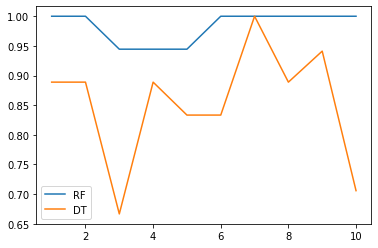

In [7]:
# ————————————————交叉验证————————————————
from cProfile import label
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='RF')
plt.plot(range(1,11),clf_s,label='DT')
plt.legend()
plt.show()

随机森林的效果较好

##### 5.画出随机森林和决策树在十组交叉验证下的效果对比

10次10折交叉验证 ---> 100次交叉验证

通常很少做

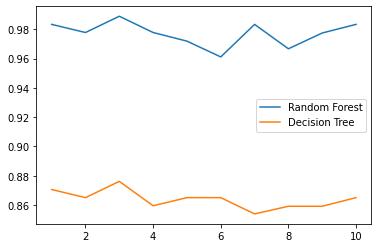

In [8]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)


plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

##### 6.n_estimators的学习曲线

n_estimators的数量上升到一定成都以后， score就不会再提升


In [9]:
# ————————————计算时间很长————————————
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))  # 找到最优的n_estimators 和最高的scores
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()


# list.index(object) >>> 对象object在列表list当中的索引


KeyboardInterrupt: 

#### 2.1.3 random_state

- 装袋集成算法是对基评估器的预测结果进行**平均或用多数表**决原则来决定集成评估器的结果

- 半数以上的树都判断错误的概率很低

- 基分类器要独立（判断正确的概率不能是50%）且不同

- 决策树从最重要的特征中随机选择出一个特征来进行分枝，因此每次生成的决策树都不一样，这个功能由参数random_state控制。

- 随机森林中其实也有random_state，用法和分类树中相似，只不过在分类树中，一个random_state只控制生成一棵树，而随机森林中的random_state控制的是生成森林的模式，而非让一个森林中只有一棵树。

**重要属性**
- .estimators_

In [12]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

#随机森林的重要属性之一：estimators_，查看森林中树的状况
rfc.estimators_

# 唯一不同的就random——state

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [13]:
# ——————————查看所有的树的random_state————————————
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)


1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [ ]:
rfc.estimators_[0].random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

#### 2.1.4 bootstrap & oob_score

- bootstrap 控制有放回的随机采用 **bootstrap参数默认True，代表采用这种有放回的随机抽样技术**
  - 多次抽样以后，仍有37%的数据从未被抽中---> 作为测试集 
  - 在使用随机森林时，我们可以不划分测试集和训练集，只需要用袋外数据来测试我们的模型即可
- oob_score_来查看我们的在袋外数据上测试的结果

In [14]:
#————————————无须划分训练集和测试集————————————
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)   # 无须划分test train 直接调用完整的数据

# 也可以划分数据集 做交叉验证  有两种方法

In [15]:
# 查看重要属性 oob_score_
rfc.oob_score_

0.9550561797752809

### 2.2 重要属性和接口

随机森林的接口与决策树完全一致，因此依然有四个常用接口：**apply, fit, predict和score**。除此之外，还需要注
意随机森林的`predict_proba`接口，这个接口返回每个测试样本对应的被分到每一类标签的概率，标签有几个分类就返回几个概率。

In [16]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain,Ytrain)

In [17]:
rfc.score(Xtest,Ytest)    # 预测的准确率

0.9444444444444444

In [18]:
rfc.feature_importances_  # 所有的特征的重要性  可以使用zip

array([0.1048912 , 0.03417487, 0.01533846, 0.0112964 , 0.04784114,
       0.03463573, 0.09674815, 0.01274029, 0.02374542, 0.16723393,
       0.0880551 , 0.20558966, 0.15770964])

In [20]:
rfc.apply(Xtest)  # 输入测试集 返回这个样本在每一课树中的叶子节点

array([[17, 18,  6, ..., 14, 20, 10],
       [10,  8,  6, ..., 13, 13,  9],
       [ 5, 15,  6, ...,  4, 20,  2],
       ...,
       [ 8,  6,  5, ..., 13, 17,  4],
       [11, 10,  3, ..., 11,  4,  2],
       [ 5,  7,  5, ...,  4, 17,  7]], dtype=int64)

In [21]:
rfc.predict(Xtest)  # 返回预测的结果

array([0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 2, 1])

In [22]:
rfc.predict_proba(Xtest)  # 返回每一个样本被分类到不同类的概率

array([[0.96, 0.04, 0.  ],
       [0.12, 0.88, 0.  ],
       [0.36, 0.08, 0.56],
       [0.  , 0.68, 0.32],
       [0.84, 0.08, 0.08],
       [0.  , 0.96, 0.04],
       [0.  , 0.96, 0.04],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.56, 0.44],
       [0.  , 0.84, 0.16],
       [0.84, 0.16, 0.  ],
       [0.52, 0.4 , 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.16, 0.84],
       [0.  , 1.  , 0.  ],
       [0.72, 0.28, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.8 , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.6 , 0.4 , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.12, 0.72, 0.16],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.12, 0.84],
       [0.  , 0.4 , 0.6 ],
       [0.  , 1.  , 0.  ],
       [0.56, 0.44, 0.  ],
       [0.08, 0.92, 0.  ],
 

## 3.RandomForestRegression
```
class sklearn.ensemble.RandomForestRegressor (n_estimators=’warn’, criterion=’mse’, max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,
n_jobs=None, random_state=None, verbose=0, warm_start=False)
```
所有的参数，属性与接口，全部和随机森林分类器一致。仅有的不同就是回归树与分类树的不同，不纯度的指标，
参数Criterion不一致。

### 3.1 重要参数，属性与接口

**criterion**
- mse  
- friedman_mse
- mae 绝对平均误差

在回归树中，MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡量回归树回归质量的指标。回归树的接口score返回的是R平方，并不是MSE

得一提的是，虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误
差“（neg_mean_squared_error）。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均
方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的
均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字

**重要属性和接口**
- apply
- fit
- predict
- score
- 随机森林回归并**没有predict_proba**这个接口

In [23]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [24]:
boston = load_boston()

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [26]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)  # 实例化
cross_val_score(regressor, boston.data, boston.target, cv=10        # 交叉验证
                ,scoring = "neg_mean_squared_error")                # scoring默认返回R2
# 返回10次交叉验证的负的均方误差结果 如果只想要均方误差 去掉负号即可

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [28]:
# ————————sklearn当中模型评估指标列表——————————
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### 3.2 实例：用随机森林回归填补缺失值

在sklearn中，我们可以使用sklearn.impute.SimpleImputer来轻松地将均值，中值，或者其他最常用的数值填补到数据中，在这个案例中，我们将使用均值，0，和随机森林回归来填补缺失值，并验证四种状况下的拟合状况，找出对使用的数据集来说最佳的缺失值填补方法。

##### 1.导入需要的库

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer  # 填补缺失值
from sklearn.ensemble import RandomForestRegressor



##### 2.导入完整的数据集并探索

- randint(上限,下线,n) 在上限和下限之间取出n个长度

In [32]:
dataset = load_boston()

dataset.data.shape
#总共506*13=6578个数据

(506, 13)

In [31]:
X_full, y_full = dataset.data, dataset.target   # 没有缺失值的数据 自行创造缺失数据
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [33]:
#首先确定缺失数据的比例，设定为50% ---> 总共缺失3289

rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
# np.floor 向下取整 >> 返回.0 格式的浮点数 --> 转换为整形

In [34]:
n_missing_samples

3289

In [37]:
# 所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
# 如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可
# 以利用索引来为数据中的任意3289个位置赋空值
# 然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)
# randint(上限,下线,n) 在上限和下限之间取出n个长度

In [38]:
print(missing_features,missing_samples)

[12  5  0 ... 11  0  2] [150 125  28 ... 132 456 402]


In [39]:
# 我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果我们需要
# 的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，
# 因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中

#————————————生成缺失的数据集——————————————
X_missing = X_full.copy()
y_missing = y_full.copy()
X_missing[missing_samples,missing_features] = np.nan

X_missing = pd.DataFrame(X_missing)

In [40]:
X_missing  
# 特征可以缺失值，但是不对标签做缺失 ---> 不然就是无监督学习了

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


##### 4.使用0和均值填补缺失值


In [41]:
#————————————————利用均值进行填充——————————————
# 训练fit + 导出predict >>> 特殊化接口 fit——transform
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')   # 实例化 ---> 使用均值替换所有的np.nan

X_missing_mean = imp_mean.fit_transform(X_missing)

In [46]:
pd.DataFrame(X_missing_mean)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.627579,10.722951,11.163464,0.000000,0.573000,6.305921,69.1,3.856371,1.000000,405.935275,21.000000,352.741952,9.670000
502,0.045270,0.000000,11.930000,0.000000,0.573000,6.120000,76.7,2.287500,1.000000,273.000000,18.521192,396.900000,9.080000
503,3.627579,10.722951,11.930000,0.066007,0.573000,6.976000,91.0,3.856371,9.383871,405.935275,21.000000,352.741952,5.640000
504,0.109590,0.000000,11.930000,0.066007,0.573000,6.305921,89.3,3.856371,1.000000,405.935275,21.000000,393.450000,6.480000


In [43]:
#——————————————使用0进行填补————————————————
# constant 常数 ，常数等于0
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [45]:
pd.DataFrame(X_missing_0)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.00,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.00,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.00,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.00,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,69.1,0.0000,1.0,0.0,21.0,0.00,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,0.0,396.90,9.08
503,0.00000,0.0,11.93,0.0,0.573,6.976,91.0,0.0000,0.0,0.0,21.0,0.00,5.64
504,0.10959,0.0,11.93,0.0,0.573,0.000,89.3,0.0000,1.0,0.0,21.0,393.45,6.48


##### 5.使用随机森林填补缺失值



对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新
的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_test，这部分数据既有标签也有特征，而它缺失的部
分，只有特征没有标签，就是我们需要预测的部分。

特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train
特征T不缺失的值：Y_train

特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test
特征T缺失的值：未知，我们需要预测的Y_test

这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。

那如果数据中除了特征T之外，其他特征也有缺失值怎么办？

答案是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。

填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填
补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。当
进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何的其他特征需要用0来进行填补了，
而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。
遍历所有的特征后，数据就完整，不再有缺失值了。

In [47]:
X_missing_reg = X_missing.copy()

In [55]:
# 找出数据集中，缺失值从小到大的排列的特征们的顺序
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
sortindex

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [50]:
# 每一个特征中缺失值的数量

np.sort(X_missing_reg.isnull().sum(axis=0))   # 缺失了索引

array([185, 189, 196, 197, 197, 200, 200, 201, 201, 202, 203, 204, 214],
      dtype=int64)

In [51]:
np.argsort(X_missing_reg.isnull().sum(axis=0))
# 返回:从小到大排序的顺序所对应的索引

0      6
1     12
2      8
3      7
4      9
5      0
6      2
7      1
8      5
9      4
10     3
11    10
12    11
dtype: int64

In [52]:
for i in sortindex:

    #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)

    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)

    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]

    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

##### 6.对填补好的数据进行建模

In [53]:
#对所有数据进行建模，取得MSE结果

X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]

mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',
    cv=5).mean()
    mse.append(scores * -1)  # 前面设置交叉验证的评价分数为负的MSE --> 转换为正数

##### 7.用所得结果画出条形图

- 采用不同方法填充缺失值后 ---> 利用随机森林回归的MSE 对比 

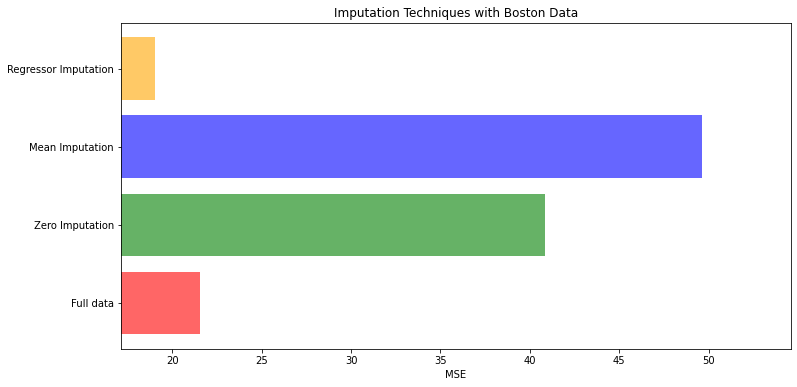

In [54]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
    
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
    right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)

plt.show()

## 4.机器学习中调参的基本思想

- 随机森林的调参方向： 降低复杂度
- 调参顺序 从上到下：
  - n_esimators
  - max_depth   默认就是最大复杂度
  - min_samples_leaf  默认都是最小
  - min_samples_split 默认最小
  - max_features
  - criterion

那我们首先来讲讲正确的调参思路。模型调参，第一步是要找准目标：我们要做什么？一般来说，这个目标是提升
某个模型评估指标，比如对于随机森林来说，我们想要提升的是模型在未知数据上的准确率（由score或oob_score_来衡量）。找准了这个目标，我们就需要思考：模型在未知数据上的准确率受什么因素影响？

在机器学习中，我们用来衡量模型在未知数据上的准确率的指标，叫做泛化误差（Genelization error）

**泛化误差**
  
当模型太复杂，模型就会过拟合，泛化能力就不够，所以泛化误差大。当模型太简单，模型就会欠拟合，拟合能力
就不够，所以误差也会大。只有当模型的复杂度刚刚好的才能够达到泛化误差最小的目标
    
- 模型太复杂或者太简单，都会让泛化误差高，我们追求的是位于中间的平衡点
- 模型太复杂就会过拟合，模型太简单就会欠拟合
- 对树模型和树的集成模型来说，树的深度越深，枝叶越多，模型越复杂
- 树模型和树的集成模型的目标，都是减少模型复杂度，把模型往图像的左边移动

## 5.实例：随机森林在乳腺癌数据上的调参

基于方差和偏差的调参方法，在乳腺癌数据上进行一次随机森林的调参。乳腺癌数据是sklearn自带的分类数据之一。


##### 1.导入数据

In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### 2.导入数据集

In [61]:
data = load_breast_cancer()

In [62]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [63]:
data.data.shape

(569, 30)

In [64]:
data.target
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

##### 3.进行一次简单的建模，看看模型本身在数据集上的效果

In [65]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)  # 实例化
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()  #交叉验证
score_pre
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以上的准确率


0.9648809523809524

##### 4.先来调n_estimators

0.9631265664160402 71


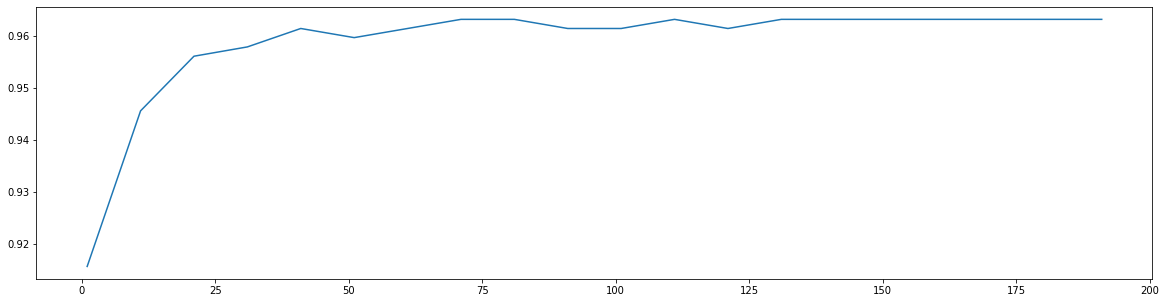

In [67]:
#####【TIME WARNING: 30 seconds】#####
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,  # n_esimators不能为0
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()

    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)

plt.figure(figsize=[20,5])   # 画布的大小（20,5）
plt.plot(range(1,201,10),scorel)
plt.show()

#list.index([object])
#返回这个object在列表list中的索引

# 41个树时 达到的最高值 ---> 但是还不如之前的... 可能取值范围里不包含最佳的结果

##### 5.在确定好的范围内，进一步细化学习曲线

0.9666353383458647 43


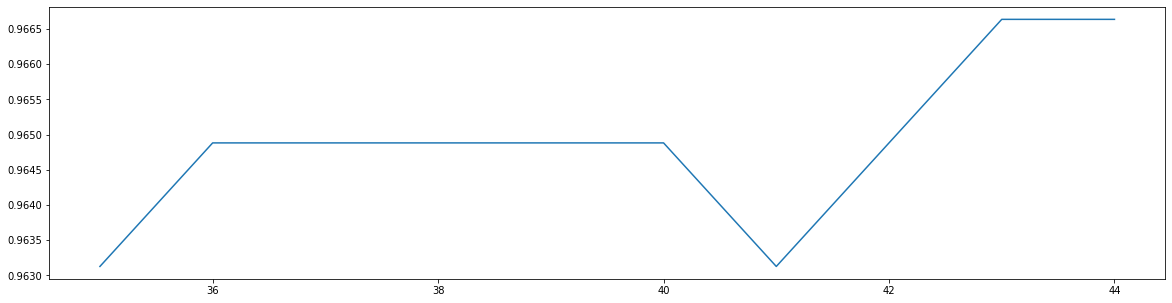

In [70]:
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)

print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()


为什么我们不同时调整多个参数呢？原因有两个：
1）同时调整多个参数会运行非常缓慢，
2）同时调整多个参数，会让我们无法理解参数的组合是怎么得来的，所以即便网格搜索调出来的结果不好，我们也不知道从哪里去改。

##### 6.为网格搜索做准备，书写网格搜索的参数

有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势从曲线跑出的结果中选取一个更小的区间，再跑曲线

##### 7.调整max_depth

In [71]:
# 调整max_depth

param_grid = {'max_depth':np.arange(1, 20, 1)}

# 一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
# 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
# 更应该画出学习曲线，来观察深度对模型的影响

rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_
GS.best_score_

0.9631265664160402

##### 8.调整max_features

In [72]:
# 调整max_features
param_grid = {'max_features':np.arange(5,30,1)}
"""
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
"""
rfc = RandomForestClassifier(n_estimators=39
,random_state=90
)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_
GS.best_score_

0.968421052631579

整体的调参过程 查看PDF